In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial import distance
from scipy import spatial
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

%matplotlib inline

In [60]:
df = pd.read_csv("C:\\Users\\kim\\Downloads\\multipleChoiceResponses.csv", encoding='latin-1')
df.head()

C:\Users\kim\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (31,83,86,87,98,99,109,116,123,124,127,129,130,164) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
gender_df = df['GenderSelect'].value_counts()
gender_df = gender_df.to_frame()
gender_df = gender_df.reset_index()
columns = ['Gender','Total']
gender_df.columns = columns

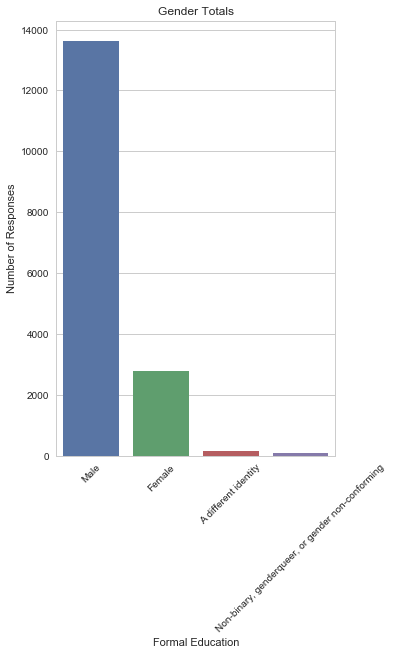

In [62]:
sns.set_style('whitegrid')
plt.figure(figsize=(5, 8))
figure = sns.barplot(x='Gender', y='Total', data=gender_df)
plt.xlabel('Formal Education')
plt.ylabel('Number of Responses')
plt.title('Gender Totals')
for tick in figure.get_xticklabels():
    tick.set_rotation(45)

In [63]:
ed_df = df['FormalEducation'].value_counts()
ed_df = ed_df.to_frame()
ed_df = ed_df.reset_index()
columns = ['Education','Total']
ed_df.columns = columns

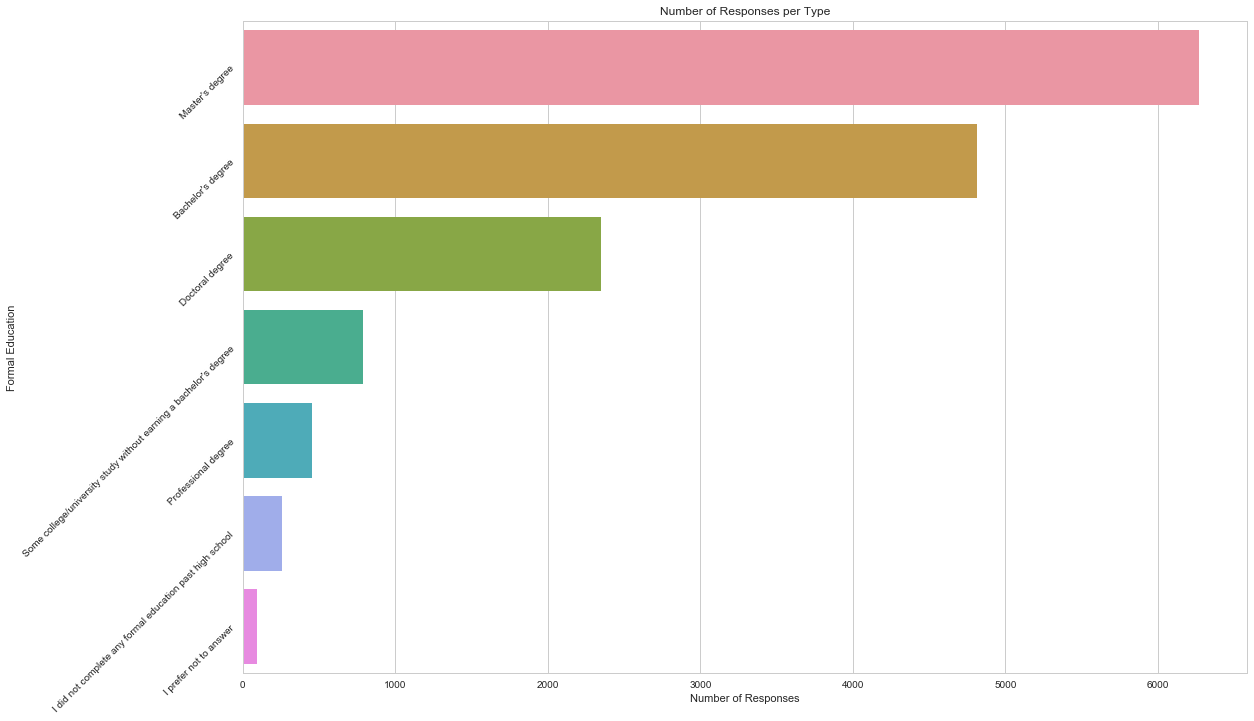

In [64]:
sns.set_style('whitegrid')
plt.figure(figsize=(18, 12))
figure = sns.barplot(x='Total', y='Education', data=ed_df)
plt.xlabel('Number of Responses')
plt.ylabel('Formal Education')
plt.title('Number of Responses per Type')
for tick in figure.get_yticklabels():
    tick.set_rotation(45)

In [65]:
major_df = df['MajorSelect'].value_counts()
major_df = major_df.to_frame()
major_df = major_df.reset_index()
columns = ['Major','Total']
major_df.columns = columns

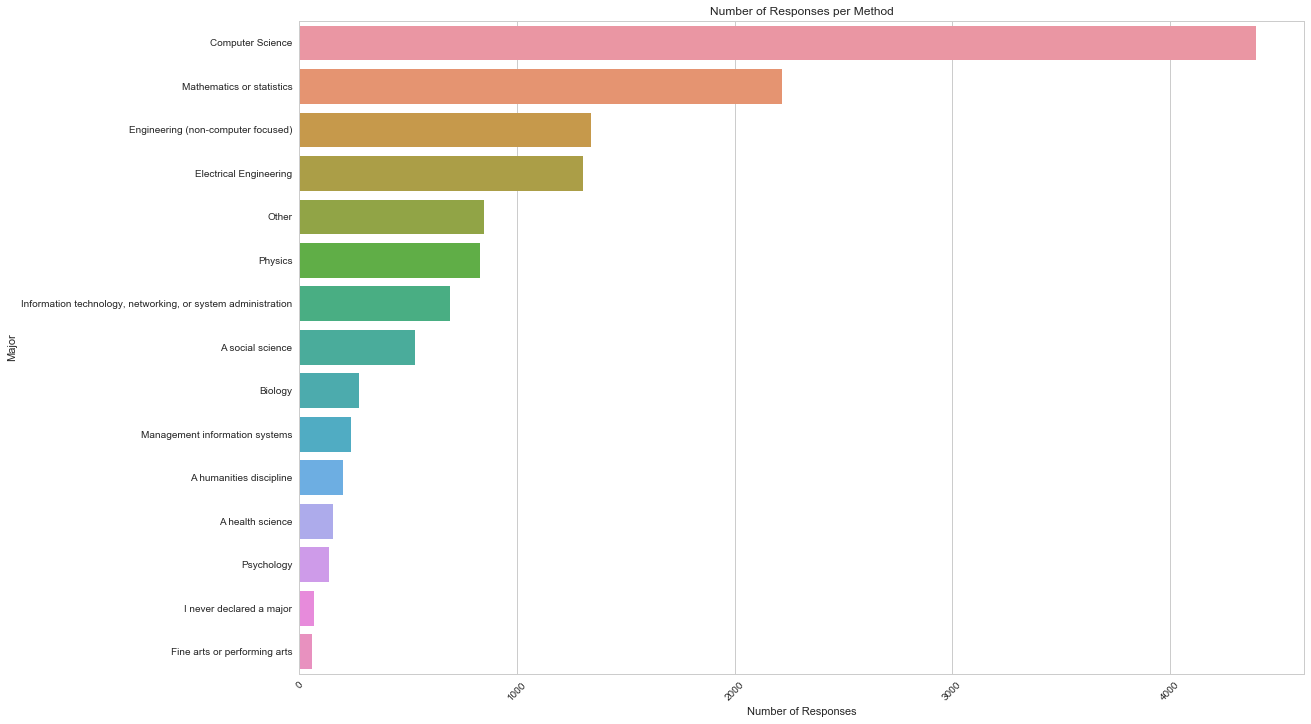

In [66]:
sns.set_style('whitegrid')
plt.figure(figsize=(18, 12))
figure = sns.barplot(x='Total', y='Major', data=major_df)
plt.xlabel('Number of Responses')
plt.ylabel('Major')
plt.title('Number of Responses per Method')
for tick in figure.get_xticklabels():
    tick.set_rotation(45)

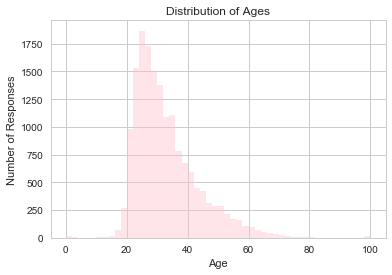

In [67]:
sns.set_style('whitegrid')
sns.distplot(df['Age'].dropna(), norm_hist=False, kde=False, hist_kws={"color":'pink'})
plt.xlabel('Age')
plt.ylabel('Number of Responses')
plt.title('Distribution of Ages')

In [68]:
df['DataScienceIdentitySelect'].value_counts()

No                        5314
Yes                       4257
Sort of (Explain more)    3100
Name: DataScienceIdentitySelect, dtype: int64

GenderSelect
A different identity                                 Axes(0.125,0.125;0.775x0.755)
Female                                               Axes(0.125,0.125;0.775x0.755)
Male                                                 Axes(0.125,0.125;0.775x0.755)
Non-binary, genderqueer, or gender non-conforming    Axes(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

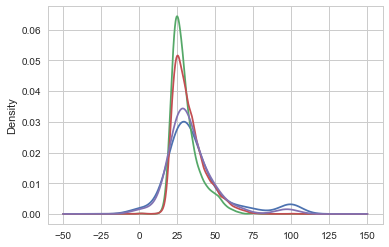

In [69]:
df.groupby('GenderSelect').Age.plot(kind='kde')

In [70]:
groupbyGender = df.groupby(['GenderSelect','DataScienceIdentitySelect']).size().reset_index()
columns = ['GenderSelect', 'DataScienceIdentitySelect','Total']
groupbyGender.columns = columns

In [71]:
groupbyGenderTenure = df.groupby(['GenderSelect','Tenure']).size().reset_index()
groupbyGenderTenure.columns = ['GenderSelect','Tenure','Total']

In [72]:
groupbyGenderTenure['Sum'] = groupbyGenderTenure['Total'].sum()
groupbyGenderTenure['Percentage'] = groupbyGenderTenure['Total']/groupbyGenderTenure['Sum']
groupbyGenderTenure

,GenderSelect,Tenure,Total,Sum,Percentage
0,A different identity,1 to 2 years,18,13485,0.001335
1,A different identity,3 to 5 years,21,13485,0.001557
2,A different identity,6 to 10 years,17,13485,0.001261
3,A different identity,I don't write code to analyze data,17,13485,0.001261
4,A different identity,Less than a year,14,13485,0.001038
5,A different identity,More than 10 years,19,13485,0.001409
6,Female,1 to 2 years,646,13485,0.047905
7,Female,3 to 5 years,529,13485,0.039229
8,Female,6 to 10 years,242,13485,0.017946
9,Female,I don't write code to analyze data,120,13485,0.008899


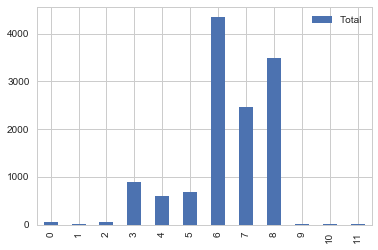

In [73]:
groupbyGender.plot.bar()

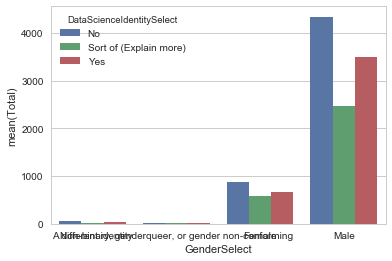

In [74]:
sns.barplot(x="GenderSelect", y="Total", hue="DataScienceIdentitySelect", data=groupbyGender,
           order=["A different identity","Non-binary, genderqueer, or gender non-conforming","Female","Male"])

In [75]:
features = pd.DataFrame()
features['Age65'] = np.where(df['Age']>=65, 1, 0)
features['Age5065'] = np.where((df['Age']>=50) & (df['Age']<65),1,0)
features['Age4050'] = np.where((df['Age']>=40) & (df['Age']<50),1, 0)
features['Age3040'] = np.where((df['Age']>=30) & (df['Age']<40),1, 0)
features['Age2030'] = np.where((df['Age']>=20) & (df['Age']<30),1, 0)
features['Age20'] = np.where((df['Age']>=40) & (df['Age']<50),1, 0)

In [76]:
features.head()


,Age65,Age5065,Age4050,Age3040,Age2030,Age20
0,0,0,0,0,0,0
1,0,0,0,1,0,0
2,0,0,0,0,1,0
3,0,1,0,0,0,0
4,0,0,0,1,0,0


In [77]:
features['Gender'] = df['GenderSelect']

In [82]:
mask = features.Gender == 'Male'
column_name = 'Gender'
features.loc[mask, column_name] = 0
mask = features.Gender == 'Female'
column_name = 'Gender'
features.loc[mask, column_name] = 1
mask = features.Gender == 'Non-binary, genderqueer, or gender non-conforming'
column_name = 'Gender'
features.loc[mask, column_name] = 2
mask = features.Gender == 'A different identity'
column_name = 'Gender'
features.loc[mask, column_name] = 3
features.head()


,Age65,Age5065,Age4050,Age3040,Age2030,Age20,Gender
0,0,0,0,0,0,0,2
1,0,0,0,1,0,0,1
2,0,0,0,0,1,0,0
3,0,1,0,0,0,0,0
4,0,0,0,1,0,0,0


In [83]:
df['FormalEducation'].value_counts()

Master's degree                                                      6273
Bachelor's degree                                                    4811
Doctoral degree                                                      2347
Some college/university study without earning a bachelor's degree     786
Professional degree                                                   451
I did not complete any formal education past high school              257
I prefer not to answer                                                 90
Name: FormalEducation, dtype: int64

In [84]:
features['Masters'] = np.where(df['FormalEducation']=='Master\'s Degree', 1, 0)
features['PhD'] = np.where(df['FormalEducation']=='Doctoral Degree',1,0)
features['Bachelors'] = np.where(df['FormalEducation']=='Bachelor\'s Degree',1, 0)
features['Some'] = np.where(df['FormalEducation']=='Some college/university study without earning a bachelor\'s degree',1, 0)
features['Professional'] = np.where(df['FormalEducation']=='Professional degree',1, 0)
features['HighSchool'] = np.where(df['FormalEducation']=='I did not complete any formal education past high school',1, 0)
features['NA'] = np.where(df['FormalEducation']=='I prefer not to answer',1, 0)

In [85]:
features.head()

,Age65,Age5065,Age4050,Age3040,Age2030,Age20,Gender,Masters,PhD,Bachelors,Some,Professional,HighSchool,NA
0,0,0,0,0,0,0,2,0,0,0,0,0,0,0
1,0,0,0,1,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [88]:
features[features['Some']>0]

,Age65,Age5065,Age4050,Age3040,Age2030,Age20,Gender,Masters,PhD,Bachelors,Some,Professional,HighSchool,NA
23,0,0,0,0,1,0,0,0,0,0,1,0,0,0
30,0,1,0,0,0,0,0,0,0,0,1,0,0,0
43,0,0,0,0,1,0,1,0,0,0,1,0,0,0
45,0,0,0,0,1,0,0,0,0,0,1,0,0,0
46,0,0,0,1,0,0,0,0,0,0,1,0,0,0
94,0,0,0,0,1,0,0,0,0,0,1,0,0,0
123,0,0,0,0,1,0,1,0,0,0,1,0,0,0
137,0,0,0,1,0,0,0,0,0,0,1,0,0,0
144,0,0,0,0,1,0,0,0,0,0,1,0,0,0
146,0,0,0,0,1,0,0,0,0,0,1,0,0,0
